<h1>Linear regression with one variable </h1>

<h2>Predicting Philadelphia' houses prices related to crime rate</h2>

We want to predict the price of an house in Philadelphia area based on crime rate.</br> 

@author: SIMONINI Thomas </br>

<p>Data used : <a href="https://www.opendataphilly.org/">Open data philly</a></p>

<a href="www.github.com/simoninithomas">Github</a></br>

<a href="http://www.simoninithomas.com">My Professional website </a></br>

<h3>Step 1 : Import the libraries </h3>

We'll use :
    - Pandas as a data analysis.
    - Matplot as our 2D plotting library.
    - Sklearn as our Machine Learning library.
    - Numpy as a scientific computing in Python. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

<h3>Step 2 : Gather the data</h3>

In [5]:
data = pd.read_csv("philly.csv")
data.head()
print data

    HousePrice  HsPrc ($10,000)  CrimeRate  MilesPhila  PopChg  \
0       140463          14.0463       29.7        10.0    -1.0   
1       113033          11.3033       24.1        18.0     4.0   
2       124186          12.4186       19.5        25.0     8.0   
3       110490          11.0490       49.4        25.0     2.7   
4        79124           7.9124       54.1        19.0     3.9   
5        92634           9.2634       48.6        20.0     0.6   
6        89246           8.9246       30.8        15.0    -2.6   
7       195145          19.5145       10.8        20.0    -3.5   
8       297342          29.7342       20.2        14.0     0.6   
9       264298          26.4298       20.4        26.0     6.0   
10      134342          13.4342       17.3        31.0     4.2   
11      147600          14.7600       50.3         9.0    -1.0   
12       77370           7.7370       34.2        10.0    -1.2   
13      170822          17.0822       33.7        32.0     2.4   
14       4

<h3> Step 3 : Take the feature and the target </h3>

In [6]:
# Take the feature (Sq ft)
dataX = data["CrimeRate"]

In [7]:
# Take the target (Price)
dataY = data["HousePrice"]

<h3>Step 4: Plot the data</h3>

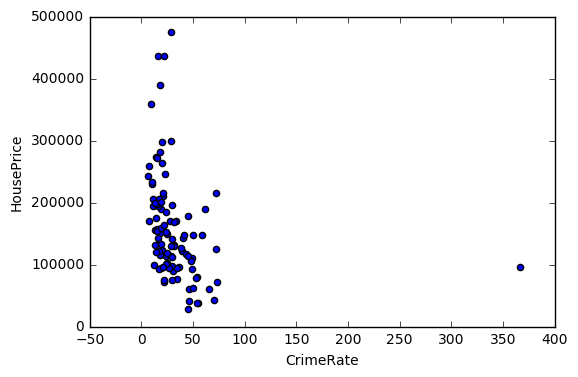

In [10]:
plot = data.plot(kind='scatter', x='CrimeRate', y='HousePrice')
plt.show()

<h3>Step 5: Split the data</h3>

From sckilearn documentation : Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

<p>Split the data into training set and testing set </p>

In [11]:
# Split the data into training/testing sets
data_trainX = dataX[:-10]
data_testX = dataX[90:]

In [12]:
# Split the data into training/testing targets
data_trainY = dataY[:-10]
data_testY = dataY[90:]

<h3>Step 6: Create linear regression object and train the data set </h3>

In [23]:
model = linear_model.LinearRegression()

In [28]:
# Train the model using the training sets
model.fit(data_trainX.reshape(-1, 1), data_trainY)
print model
print model.coef_
print model.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[-559.35338189]
175251.845399


In [54]:
# The coefficients
print('Coefficients: \n', model.coef_, model.intercept_)

# The mean squared error (Cost function)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(data_trainX.reshape(-1, 1)) - data_trainY) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(data_trainX.reshape(-1, 1), data_trainY))

#Test : 
result = model.coef_ + (model.intercept_ * 29.7)
print result

('Coefficients: \n', array([-2422.97113193]), 228223.82095103385)
Mean squared error: 7568608604.26
Variance score: 0.06
[ 6775824.51111378]


<h3>Step 7 : Plot the result</h3>

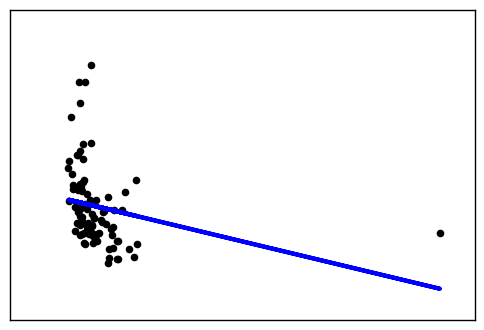

In [56]:
# Plot outputs
plt.scatter(data_trainX.reshape(-1, 1), data_trainY,  color='black')
plt.plot(data_trainX, regr.predict(data_trainX.reshape(-1, 1)), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<h2> Improve our Model : Remove high-value outlier  </h2>

<h3>Step 1: Remove High value outlier</h3>

In [39]:
data_noOutlier = pd.read_csv("philly.csv")
data_noOutlier = data[data['MilesPhila'] != 0.0] 
data_noOutlier.head()
print data_noOutlier

    HousePrice  HsPrc ($10,000)  CrimeRate  MilesPhila  PopChg  \
0       140463          14.0463       29.7        10.0    -1.0   
1       113033          11.3033       24.1        18.0     4.0   
2       124186          12.4186       19.5        25.0     8.0   
3       110490          11.0490       49.4        25.0     2.7   
4        79124           7.9124       54.1        19.0     3.9   
5        92634           9.2634       48.6        20.0     0.6   
6        89246           8.9246       30.8        15.0    -2.6   
7       195145          19.5145       10.8        20.0    -3.5   
8       297342          29.7342       20.2        14.0     0.6   
9       264298          26.4298       20.4        26.0     6.0   
10      134342          13.4342       17.3        31.0     4.2   
11      147600          14.7600       50.3         9.0    -1.0   
12       77370           7.7370       34.2        10.0    -1.2   
13      170822          17.0822       33.7        32.0     2.4   
14       4

<h3> Step 2 : Take the feature and the target </h3>

In [40]:
# Take the feature (Sq ft)
dataXNoOutlier = data_noOutlier["CrimeRate"]

In [41]:
# Take the target (Price)
dataYNoOutlier = data_noOutlier["HousePrice"]

<h3>Step 3: Split the data</h3>

From sckilearn documentation : Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

<p>Split the data into training set and testing set </p>

In [49]:
# Split the data with no outliers into training/testing sets
data_trainXNO = dataX[:-10]
data_testXNO = dataX[90:]

In [50]:
# Split the data with no outliers into training/testing targets
data_trainYNO = dataY[:-10]
data_testYNO = dataY[90:]

<h3>Step 4: Create linear regression object and train the data set </h3>

In [51]:
model = linear_model.LinearRegression()

In [52]:
# Train the model using the training sets
model.fit(data_trainXNO.reshape(-1, 1), data_trainYNO)
print model
print model.coef_
print model.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[-2422.97113193]
228223.820951


In [53]:
# The coefficients
print('Coefficients: \n', model.coef_, model.intercept_)

# The mean squared error (Cost function)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(data_trainXNO.reshape(-1, 1)) - data_trainYNO) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(data_trainXNO.reshape(-1, 1), data_trainYNO))

#Test : 
result = model.coef_ + (model.intercept_ * 29.7)
print result

('Coefficients: \n', array([-2422.97113193]), 228223.82095103385)
Mean squared error: 7474986132.96
Variance score: 0.08
[ 6775824.51111378]


<h3>Step 4 : Plot the result</h3>

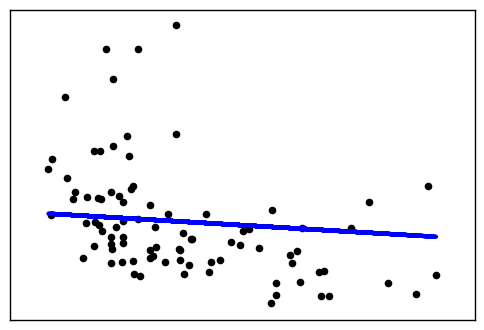

In [57]:
# Plot outputs
plt.scatter(data_trainXNO.reshape(-1, 1), data_trainYNO,  color='black')
plt.plot(data_trainXNO, regr.predict(data_trainXNO.reshape(-1, 1)), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()